<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/ESAA_YB_5%EC%A3%BC%EC%B0%A8_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [31]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [33]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [34]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [35]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [39]:
pred_proba = model_lor.predict_proba(X)
pred_proba0 = pred_proba[:,1] # y : 1 - data.target으로 바꿨기 때문에 [1] column이 0으로 예측할 확률이 됨

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.1)
y_pred2 = binarizer.fit_transform(pred_proba0.reshape(-1,1))

In [40]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
import numpy as np
accuracy = np.round(accuracy_score(y, y_pred2),4)
precision = np.round(precision_score(y, y_pred2),4)
recall = np.round(recall_score(y, y_pred2),4)
f1 = np.round(f1_score(y, y_pred2), 4)
print(confusion_matrix(y, y_pred2), accuracy, precision, recall, f1)

[[267  90]
 [  6 206]] 0.8313 0.6959 0.9717 0.811


* ROC 곡선 시각화

In [42]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y, pred_proba0)

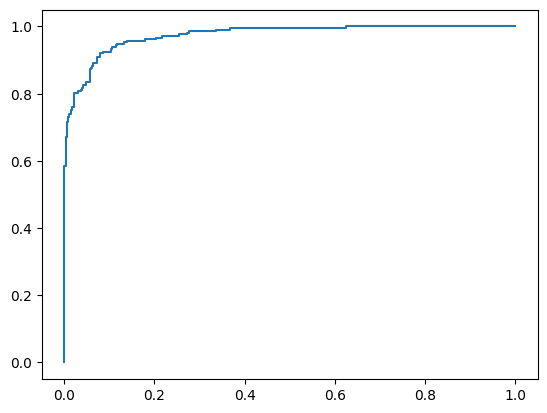

In [43]:
import matplotlib.pyplot as plt
plt.plot(fprs, tprs)

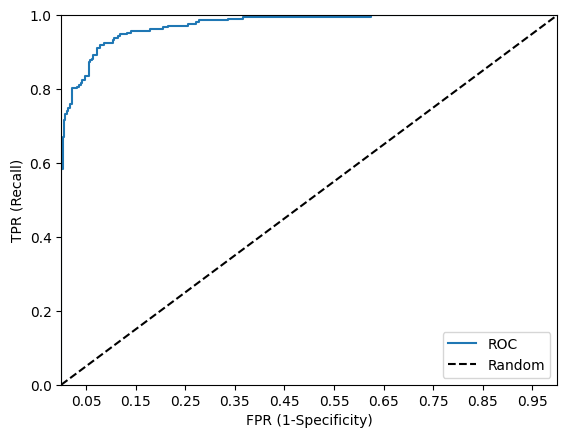

In [44]:
# 함수 사용
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR (1-Specificity)'); plt.ylabel('TPR (Recall)')
    plt.legend()

roc_curve_plot(y, model_lor.predict_proba(X)[:,1])

* ROC AUC 값

In [45]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y, model_lor.predict_proba(X)[:,1])
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9741
